In [2]:
import pandas as pd
import numpy as np
df_bosa = pd.read_csv("./bosa_news_all.csv")

In [3]:
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.3/548.3 kB 13.7 MB/s eta 0:00:0000:01


In [4]:
!ls /usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf # 한국어 폰트

/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf


In [5]:
# 10개만 가지고 오기
sentence = ''
for i in range(10):
    sentence += df_bosa['news_title'][i]

In [6]:
## 이미지의 픽셀 정보 가지고 오기
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image

In [17]:
cloud_png = np.array(Image.open('./rarefieldrogo_final.png')) 

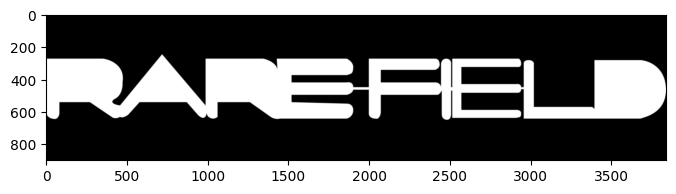

In [18]:
# 불러온 이미지 시각화하기
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.imshow(cloud_png, cmap=plt.cm.gray, interpolation='bilinear')

In [10]:
from konlpy.tag import Kkma
from konlpy.tag import Hannanum
from konlpy.tag import Okt # -> 이거 선택

kkma = Kkma()
han = Hannanum()
okt = Okt()

In [12]:
stopwords = ['희귀질환', '병원', '치료', '의료', '한국', '희귀질환의', '날']

from konlpy.tag import Okt
okt = Okt()
def tokenizer(raw, pos=['Noun', 'Verb'], stopword=stopwords):
    return [
        word for word, tag in okt.pos(raw, norm=True, stem=True)
        if len(word) >1 and tag in pos and word not in stopword
    ]

In [22]:
# 색 변경하기

import random

def gray_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    # 회색 계열의 RGB 값 범위 설정
    min_val = 60  # 어두운 회색
    max_val = 180  # 밝은 회색
    
    # 동일한 RGB 값을 갖는 회색 생성
    val = random.randint(min_val, max_val)
    return (val, val, val)

# 해당 function을 쓰게 될 경우 color_func = gray_color_func 이용

In [25]:
from collections import Counter
wordCloud = WordCloud(width=1920, height=450,background_color='white', mask=cloud_png
, stopwords = stopwords
, font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf').generate_from_text(sentence)

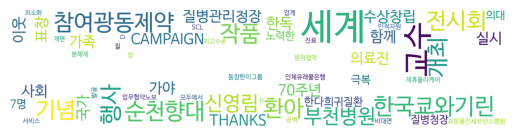

In [26]:
import matplotlib.pyplot as plt
plt.imshow(wordCloud)
plt.axis('off')
plt.show()